<a href="https://colab.research.google.com/github/yian-bian/dataframe/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib --upgrade

# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# # Upload files
from google.colab import files
uploaded = files.upload()
np.random.seed(25)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving hepatitis.data to hepatitis (1).data
Saving messidor_features.csv to messidor_features (1).csv


# Acquire, preprocess, and analyze the data

## hepatitis


In [ ]:
# define column names for the dataset
colnames1=['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

# read dataset and delete the rows with missing data
df1 = pd.read_csv("hepatitis.data", names = colnames1)
df1 = df1[~df1.eq('?').any(1)]

In [ ]:
df1.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


In [ ]:
# make sure that the dataset does not have missing values
df1.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [ ]:
df1.dtypes

Class               int64
AGE                 int64
SEX                 int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

In [ ]:
# convert all the features to a numeric type
for f in colnames1:
  df1[f] = pd.to_numeric(df1[f])
# let all the categorical (binary) features have the value 1 and 0
catag_var1 = ['Class', 'SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','HISTOLOGY']
for i in catag_var1:
    df1[i] = df1[i]-1

In [ ]:
df1.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,0.837500,40.66250,0.137500,0.525000,0.737500,0.350000,0.612500,0.850000,0.837500,0.525000,0.812500,0.687500,0.850000,0.875000,1.221250,102.912500,82.025000,3.843750,62.512500,0.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,0.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.00000
25%,1.000000,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.700000,68.250000,30.750000,3.500000,46.000000,0.00000
50%,1.000000,38.50000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,56.500000,4.000000,62.000000,0.00000
75%,1.000000,49.25000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000,133.500000,102.750000,4.200000,77.250000,1.00000
max,1.000000,72.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.800000,280.000000,420.000000,5.000000,100.000000,1.00000


In [ ]:
df1.groupby('Class').mean()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,,,,,,,,,,,,,,,,,,,
0,46.076923,0.000000,0.384615,0.846154,0.153846,0.307692,1.000000,1.00000,0.461538,0.692308,0.384615,0.461538,0.615385,1.915385,125.846154,69.307692,3.223077,41.615385,0.923077
1,39.611940,0.164179,0.552239,0.716418,0.388060,0.671642,0.820896,0.80597,0.537313,0.835821,0.746269,0.925373,0.925373,1.086567,98.462687,84.492537,3.964179,66.567164,0.313433


In [ ]:
df1.groupby('SEX').mean()

,Class,AGE,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
SEX,,,,,,,,,,,,,,,,,,,
0,0.811594,40.869565,0.521739,0.753623,0.362319,0.608696,0.855072,0.840580,0.550725,0.811594,0.710145,0.826087,0.869565,1.260870,101.536232,81.550725,3.836232,62.724638,0.434783
1,1.000000,39.363636,0.545455,0.636364,0.272727,0.636364,0.818182,0.818182,0.363636,0.818182,0.545455,1.000000,0.909091,0.972727,111.545455,85.000000,3.890909,61.181818,0.272727


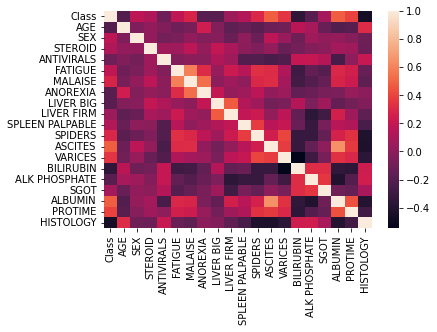

In [ ]:
sn.heatmap(df1.corr())
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

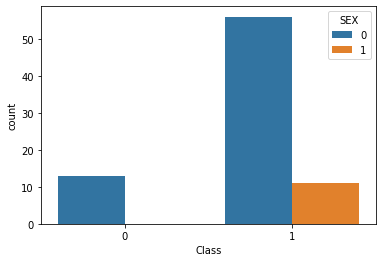

In [ ]:
sn.countplot(data = df1,x='Class',hue='SEX') # imbalanced

<AxesSubplot:xlabel='HISTOLOGY', ylabel='Class'>

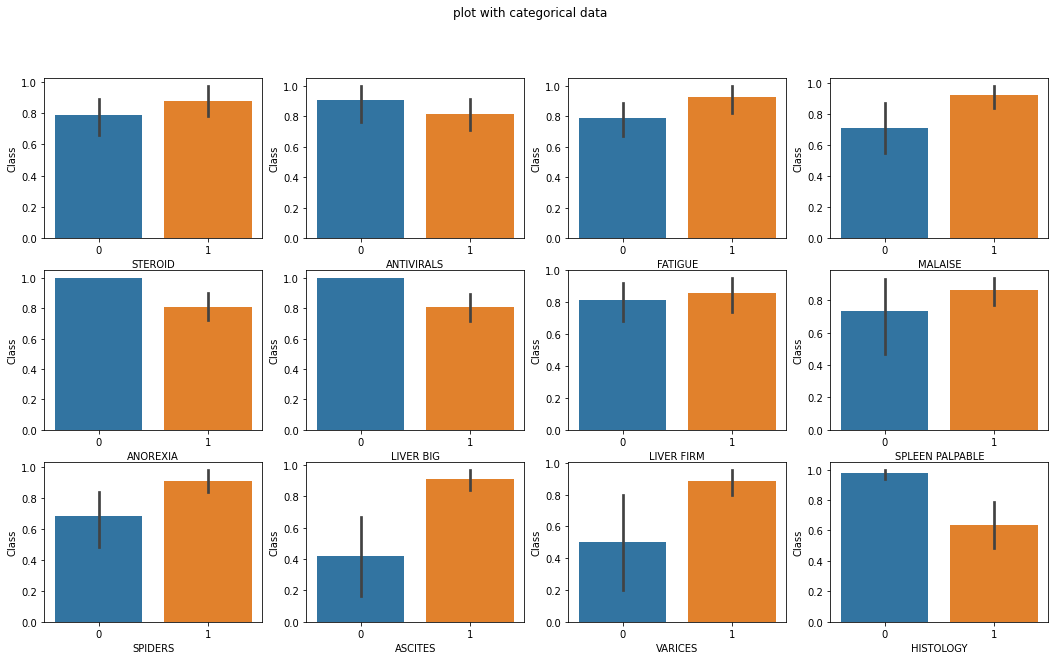

In [ ]:
fig,axes = plt.subplots(3,4, figsize = (18,10)) # 20 categorical 13 6
fig.suptitle('plot with categorical data') 
sn.barplot(ax=axes[0,0],data=df1,x='STEROID',y='Class')
sn.barplot(ax=axes[0,1],data=df1,x='ANTIVIRALS',y='Class')
sn.barplot(ax=axes[0,2],data=df1,x='FATIGUE',y='Class')
sn.barplot(ax=axes[0,3],data=df1,x='MALAISE',y='Class')
sn.barplot(ax=axes[1,0],data=df1,x='ANOREXIA',y='Class')
sn.barplot(ax=axes[1,1],data=df1,x='LIVER BIG',y='Class')
sn.barplot(ax=axes[1,2],data=df1,x='LIVER FIRM',y='Class')
sn.barplot(ax=axes[1,3],data=df1,x='SPLEEN PALPABLE',y='Class')
sn.barplot(ax=axes[2,0],data=df1,x='SPIDERS',y='Class')
sn.barplot(ax=axes[2,1],data=df1,x='ASCITES',y='Class')
sn.barplot(ax=axes[2,2],data=df1,x='VARICES',y='Class')
sn.barplot(ax=axes[2,3],data=df1,x='HISTOLOGY',y='Class')

<AxesSubplot:xlabel='PROTIME', ylabel='Count'>

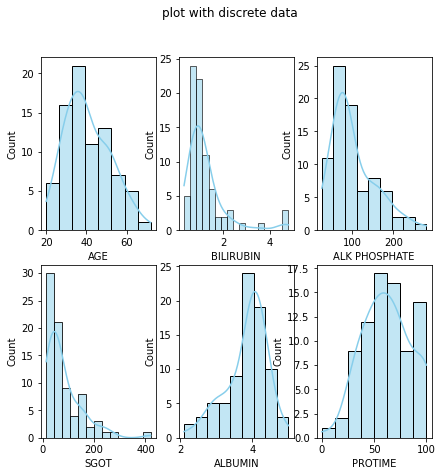

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
fig.suptitle('plot with discrete data') 
sn.histplot(data=df1, x="AGE", kde=True, color="skyblue", ax=axs[0, 0])
sn.histplot(data=df1, x="BILIRUBIN", kde=True, color="skyblue", ax=axs[0, 1])
sn.histplot(data=df1, x="ALK PHOSPHATE", kde=True, color="skyblue", ax=axs[0, 2])
sn.histplot(data=df1, x="SGOT", kde=True, color="skyblue", ax=axs[1, 0])
sn.histplot(data=df1, x="ALBUMIN", kde=True, color="skyblue", ax=axs[1, 1])
sn.histplot(data=df1, x="PROTIME", kde=True, color="skyblue", ax=axs[1, 2])


## messidor features

In [ ]:
# define column names for the dataset
colnames2 = ['QualityAssessment','PreScreening','MA 0.5','MA 0.6','MA 0.7','MA 0.8','MA 0.9','MA 1.0',
             'Detection for exudate1','Detection for exudate2','Detection for exudate3','Detection for exudate4','Detection for exudate5','Detection for exudate6','Detection for exudate7','Detection for exudate8',
             'Centre distance','Diameter','AMFMbasedClassification','Class']
catag_var2 = ['QualityAssessment','PreScreening', 'AMFMbasedClassification','Class']

# read dataset and delete the rows with missing data
df2 = pd.read_csv("messidor_features.csv", names = colnames2)
df2.shape

(1151, 20)

In [ ]:
df2.head()

,QualityAssessment,PreScreening,MA 0.5,MA 0.6,MA 0.7,MA 0.8,MA 0.9,MA 1.0,Detection for exudate1,Detection for exudate2,Detection for exudate3,Detection for exudate4,Detection for exudate5,Detection for exudate6,Detection for exudate7,Detection for exudate8,Centre distance,Diameter,AMFMbasedClassification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [ ]:
# make sure that the dataset does not have missing values
df2.isnull().sum()

QualityAssessment          0
PreScreening               0
MA 0.5                     0
MA 0.6                     0
MA 0.7                     0
MA 0.8                     0
MA 0.9                     0
MA 1.0                     0
Detection for exudate1     0
Detection for exudate2     0
Detection for exudate3     0
Detection for exudate4     0
Detection for exudate5     0
Detection for exudate6     0
Detection for exudate7     0
Detection for exudate8     0
Centre distance            0
Diameter                   0
AMFMbasedClassification    0
Class                      0
dtype: int64

In [ ]:
df2.describe()

,QualityAssessment,PreScreening,MA 0.5,MA 0.6,MA 0.7,MA 0.8,MA 0.9,MA 1.0,Detection for exudate1,Detection for exudate2,Detection for exudate3,Detection for exudate4,Detection for exudate5,Detection for exudate6,Detection for exudate7,Detection for exudate8,Centre distance,Diameter,AMFMbasedClassification,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

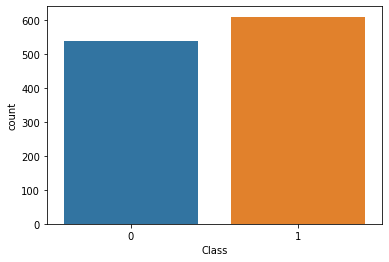

In [ ]:
sn.countplot(data = df2,x='Class') # relatively balanced

In [ ]:
df2.groupby('Class').mean()

,QualityAssessment,PreScreening,MA 0.5,MA 0.6,MA 0.7,MA 0.8,MA 0.9,MA 1.0,Detection for exudate1,Detection for exudate2,Detection for exudate3,Detection for exudate4,Detection for exudate5,Detection for exudate6,Detection for exudate7,Detection for exudate8,Centre distance,Diameter,AMFMbasedClassification
Class,,,,,,,,,,,,,,,,,,,
0,0.992593,0.940741,30.457407,30.083333,29.450000,27.862963,25.394444,19.098148,60.489056,23.077008,8.233778,1.401606,0.184963,0.042091,0.007343,0.003486,0.522960,0.109020,0.357407
1,1.000000,0.898527,45.472995,42.942717,40.170213,36.216039,31.710311,22.965630,67.285077,23.097738,9.120730,2.220838,0.892847,0.362711,0.154903,0.067043,0.523435,0.107911,0.317512


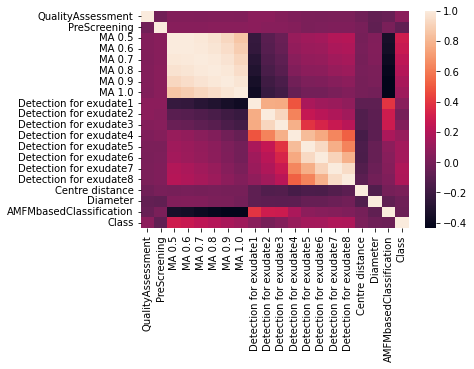

In [ ]:
sn.heatmap(df2.corr())
plt.show()

<AxesSubplot:xlabel='AMFMbasedClassification', ylabel='Class'>

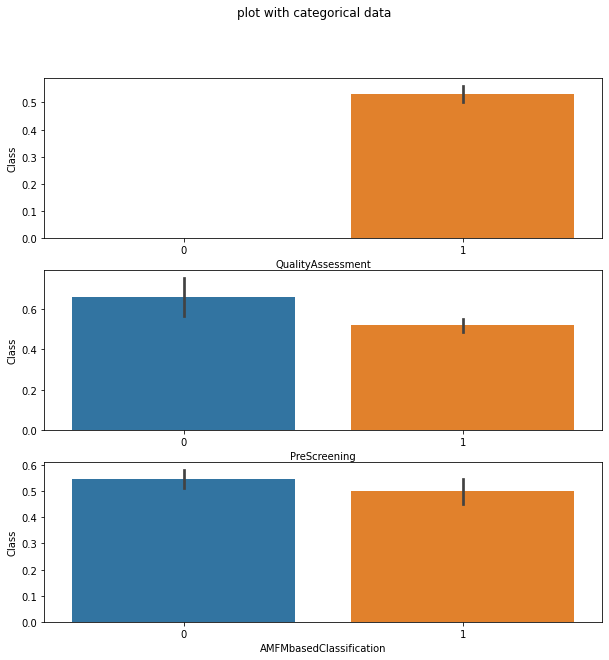

In [ ]:
fig,axes = plt.subplots(3, figsize = (10,10)) #
fig.suptitle('plot with categorical data') 
sn.barplot(ax=axes[0],data=df2,x='QualityAssessment',y='Class')
sn.barplot(ax=axes[1],data=df2,x='PreScreening',y='Class')
sn.barplot(ax=axes[2],data=df2,x='AMFMbasedClassification',y='Class')

<AxesSubplot:xlabel='MA 1.0', ylabel='Count'>

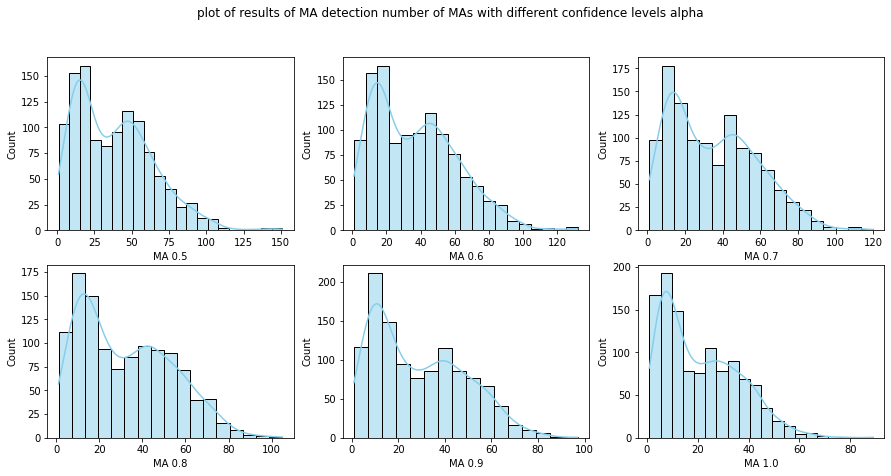

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
fig.suptitle('plot of results of MA detection number of MAs with different confidence levels alpha ') 
sn.histplot(data=df2, x="MA 0.5", kde=True, color="skyblue", ax=axs[0, 0])
sn.histplot(data=df2, x="MA 0.6", kde=True, color="skyblue", ax=axs[0, 1])
sn.histplot(data=df2, x="MA 0.7", kde=True, color="skyblue", ax=axs[0, 2])
sn.histplot(data=df2, x="MA 0.8", kde=True, color="skyblue", ax=axs[1, 0])
sn.histplot(data=df2, x="MA 0.9", kde=True, color="skyblue", ax=axs[1, 1])
sn.histplot(data=df2, x="MA 1.0", kde=True, color="skyblue", ax=axs[1, 2])

<AxesSubplot:xlabel='Detection for exudate8', ylabel='Count'>

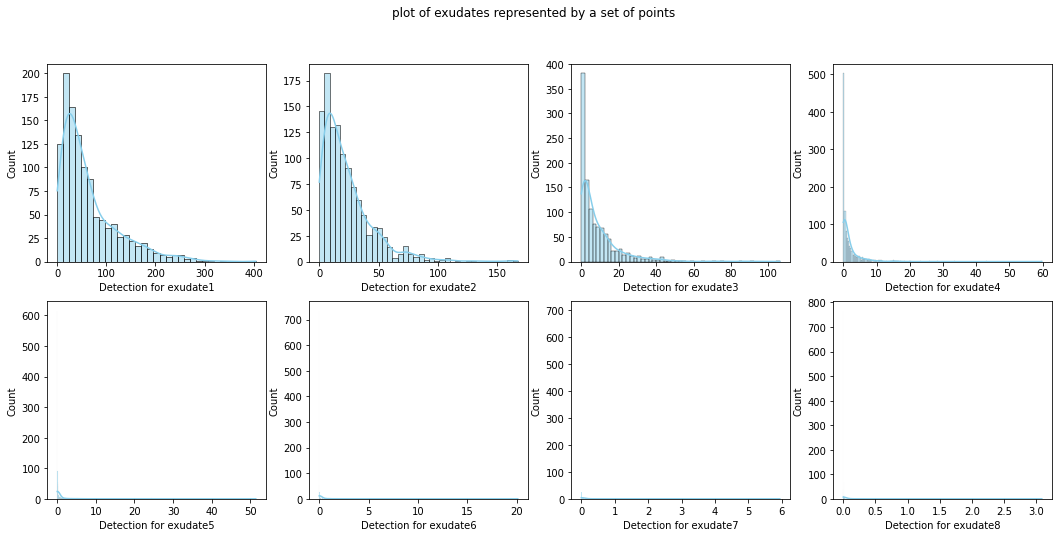

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle('plot of exudates represented by a set of points') 
sn.histplot(data=df2, x="Detection for exudate1", kde=True, color="skyblue", ax=axs[0, 0])
sn.histplot(data=df2, x="Detection for exudate2", kde=True, color="skyblue", ax=axs[0, 1])
sn.histplot(data=df2, x="Detection for exudate3", kde=True, color="skyblue", ax=axs[0, 2])
sn.histplot(data=df2, x="Detection for exudate4", kde=True, color="skyblue", ax=axs[0, 3])
sn.histplot(data=df2, x="Detection for exudate5", kde=True, color="skyblue", ax=axs[1, 0])
sn.histplot(data=df2, x="Detection for exudate6", kde=True, color="skyblue", ax=axs[1, 1])
sn.histplot(data=df2, x="Detection for exudate7", kde=True, color="skyblue", ax=axs[1, 2])
sn.histplot(data=df2, x="Detection for exudate8", kde=True, color="skyblue", ax=axs[1, 3])

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

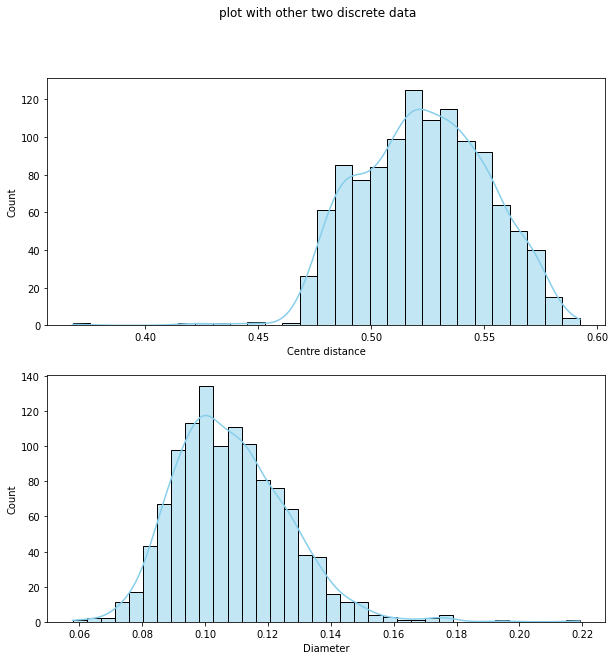

In [ ]:
fig,axes = plt.subplots(2, figsize = (10,10)) 
fig.suptitle('plot with other two discrete data') 
sn.histplot(ax=axes[0],data=df2,x='Centre distance',kde=True, color="skyblue")
sn.histplot(ax=axes[1],data=df2,x='Diameter',kde=True, color="skyblue")


# Implement Models

## KNN

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
cosine = lambda x1, x2: -np.sum(x1*x2, axis = -1)/((np.sum(x1**2, axis = -1))*(np.sum(x2**2, axis = -1))) # add a "-" such that taking the min is the same as taking the max

class KNN:

    def __init__(self, K=1, dist_fn=euclidean,C=None):
        self.dist_fn = dist_fn
        self.K = K
        self.C = C
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        if self.C is None:
          self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            #counts the number of instances of each class in the K-closest training samples
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

## Decision Tree

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
def greedy_test(node, cost_fn):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
# stopping criteria function

def stopping_criteria_met(tree,node,criteria='max_depth'):
    if criteria == "min_leaves":
        return (len(node.data_indices) <= tree.min_leaf_instances)
    elif criteria == "small_cost":
        return (tree.cost_fn(node.labels) <= tree.cost_threshold)
    else: # default criteria is max depth 
        return (node.depth == tree.max_depth)

In [ ]:
class DecisionTree:

    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1, cost_threshold = 0.05):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances
        self.cost_threshold = cost_threshold

    def fit(self, data, labels):
        pass

    def predict(self, data_test):
        pass

def fit(self, data, labels,c1='max_depth',c2='max_depth',c3='max_depth'):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self._fit_tree(self.root,c1,c2,c3)
    return self

def _fit_tree(self, node,c1,c2,c3):

    if stopping_criteria_met(self,node,c1) or stopping_criteria_met(self,node,c2) or stopping_criteria_met(self,node,c3):
        return

    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    if np.isinf(cost):
        return

    test = node.data[node.data_indices,split_feature] <= split_value
    node.split_feature = split_feature
    node.split_value = split_value
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    self._fit_tree(left,c1,c2,c3)
    self._fit_tree(right,c1,c2,c3)
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [ ]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

## Evaluate Model Accuracy

In [ ]:
def evaluate_acc(y_test_pred, y_test):
  return np.sum(y_test_pred == y_test) / y_test.shape[0]

# Running experiments

## hepatitis

### KNN

In [ ]:
# Standardize the data
std_df1 = df1.copy()
for f in colnames1:
    if f not in catag_var1:
        std_df1[f] = (std_df1[f] - std_df1[f].mean())/std_df1[f].std()

# extract x and y from the dataframe
df1_np = std_df1.to_numpy()
x1, y1 = df1_np[:, 1:], df1_np[:, 0].astype(int)

In [ ]:
# print the feature shape and classes of dataset 
(N,D), C = x1.shape, np.max(y1)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# generates an indices array from 0 to N-1 and permutes it 
inds = np.random.permutation(N)

# split the dataset into training, validation and testing set
train_ind = round(N * 0.6)
val_ind = round(N * 0.8)
x1_train, y1_train = x1[inds[:train_ind]], y1[inds[:train_ind]]
x1_val, y1_val = x1[inds[train_ind:val_ind]], y1[inds[train_ind:val_ind]]
x1_test, y1_test = x1[inds[val_ind:]], y1[inds[val_ind:]]
y1_test_knn = y1_test.copy() # save for later (model evaluation)

instances (N) 	 80 
 features (D) 	 19 
 classes (C) 	 2


In [ ]:
def run_KNN_experiment(try_distance_fn=euclidean, return_prob=False):
    model_choices=[]
    valid_acc = []

    for k in range(1,21):
        knn = KNN(K=k,dist_fn = try_distance_fn) # create a KNN object (OOP)
        y1_val_prob,_ = knn.fit(x1_train, y1_train).predict(x1_val)
        y1_val_pred = np.argmax(y1_val_prob, axis=-1)
        accuracy = evaluate_acc(y1_val_pred, y1_val)
        model_choices.append(k)
        valid_acc.append(accuracy)

    # use the best K to predict test data
    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    knn = KNN(K=best_valid_K, dist_fn = try_distance_fn)
    y1_test_prob,_ = knn.fit(x1_train, y1_train).predict(x1_test)
    y1_test_pred = np.argmax(y1_test_prob, axis=-1)
    test_accuracy = evaluate_acc(y1_test_pred, y1_test)
    print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

    plt.plot(model_choices, valid_acc, label='validation')
    plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.savefig('hepatitis_bestK.png',dpi=300,bbox_inches='tight')
    if return_prob:
        return y1_test_prob

best K = 4, test accuracy = 0.875


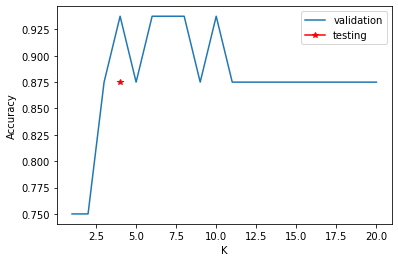

In [ ]:
y1_test_prob_knn = run_KNN_experiment(euclidean, True)

best K = 8, test accuracy = 0.9375


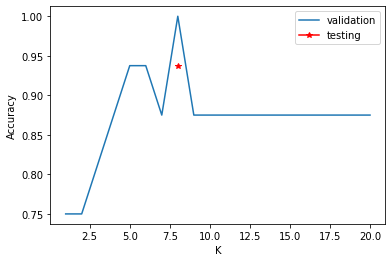

In [ ]:
run_KNN_experiment(manhattan)

best K = 3, test accuracy = 0.6875


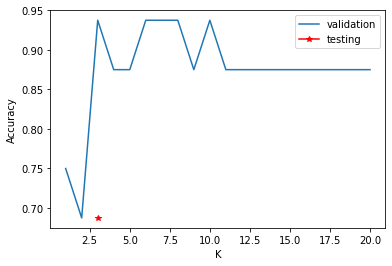

In [ ]:
run_KNN_experiment(cosine)

#### Decision Boundaries

Text(0.5, 0, 'PROTIME')

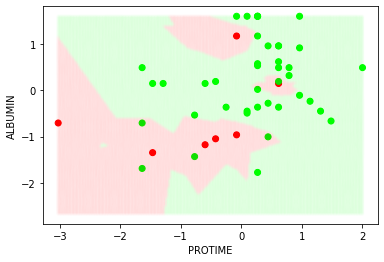

In [ ]:
x1_db_k1 = np.stack((x1[:,-3], x1[:,-2]), axis = 1)
x1_train_db_k1 = np.stack((x1_train[:,-3], x1_train[:,-2]),axis = 1)

x0v_k1 = np.linspace(np.min(x1_db_k1[:,0]), np.max(x1_db_k1[:,0]), 200)
x1v_k1 = np.linspace(np.min(x1_db_k1[:,1]), np.max(x1_db_k1[:,1]), 200)
x0_k1, x1_k1 = np.meshgrid(x0v_k1, x1v_k1)
x_all_k1 = np.vstack((x0_k1.ravel(),x1_k1.ravel())).T

model = KNN(K=2,C = 3)
y_train_prob_k1 = np.zeros((y1_train.shape[0], 3))
y_train_prob_k1[np.arange(y1_train.shape[0]), y1_train] = 1

y_prob_all_k1, _ = model.fit(x1_train_db_k1, y1_train).predict(x_all_k1)
y_pred_all_k1 = np.zeros_like(y_prob_all_k1)
y_pred_all_k1[np.arange(x_all_k1.shape[0]), np.argmax(y_prob_all_k1, axis=-1)] = 1    
    
plt.scatter(x1_train_db_k1[:,0], x1_train_db_k1[:,1], c=y_train_prob_k1, marker='o', alpha=1)
plt.scatter(x_all_k1[:,0], x_all_k1[:,1], c=y_pred_all_k1, marker='.', alpha=0.01)
plt.ylabel('ALBUMIN')
plt.xlabel('PROTIME')

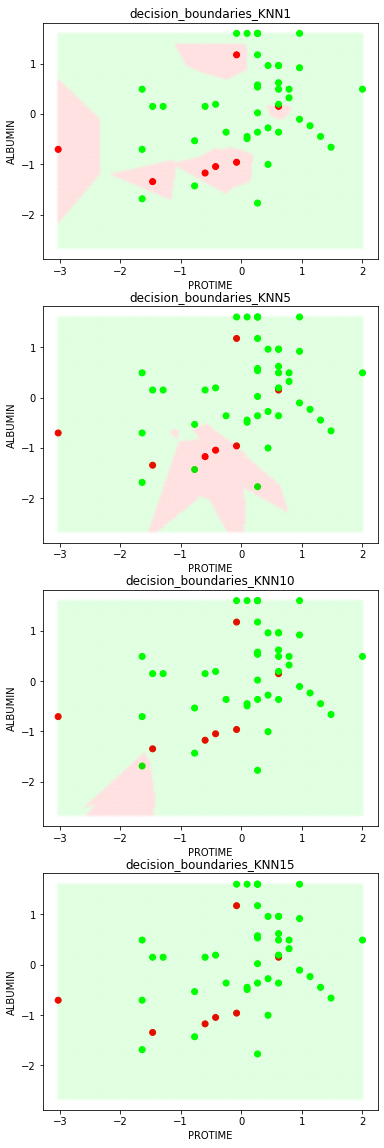

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x1_db_k1 = np.stack((x1[:,-3], x1[:,-2]), axis = 1)
x1_train_db_k1 = np.stack((x1_train[:,-3], x1_train[:,-2]),axis = 1)

x0v_k1 = np.linspace(np.min(x1_db_k1[:,0]), np.max(x1_db_k1[:,0]), 200)
x1v_k1 = np.linspace(np.min(x1_db_k1[:,1]), np.max(x1_db_k1[:,1]), 200)
x0_k1, x1_k1 = np.meshgrid(x0v_k1, x1v_k1)
x_all_k1 = np.vstack((x0_k1.ravel(),x1_k1.ravel())).T

ks = [1,5,10,15]
fig, axs = plt.subplots(len(ks))
fig.set_figheight(20)

for k in ks:
  model = KNN(K=k,C = 3)
  y_train_prob_k1 = np.zeros((y1_train.shape[0], 3))
  y_train_prob_k1[np.arange(y1_train.shape[0]), y1_train] = 1

  y_prob_all_k1, _ = model.fit(x1_train_db_k1, y1_train).predict(x_all_k1)
  y_pred_all_k1 = np.zeros_like(y_prob_all_k1)
  y_pred_all_k1[np.arange(x_all_k1.shape[0]), np.argmax(y_prob_all_k1, axis=-1)] = 1    

  index = ks.index(k)

  axs[index].scatter(x1_train_db_k1[:,0], x1_train_db_k1[:,1], c=y_train_prob_k1, marker='o', alpha=1)
  axs[index].scatter(x_all_k1[:,0], x_all_k1[:,1], c=y_pred_all_k1, marker='.', alpha=0.01)
  axs[index].set_ylabel('ALBUMIN')
  axs[index].set_xlabel('PROTIME')
  axs[index].set_title('decision_boundaries_KNN'+str(k))

### DT

In [ ]:
# extract x and y from the dataframe
df1_np = df1.to_numpy()
x1, y1 = df1_np[:, 1:], df1_np[:, 0].astype(int)

In [ ]:
# print the feature shape and classes of dataset 
(N,D), C = x1.shape, np.max(y1)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# generates an indices array from 0 to N-1 and permutes it 
inds = np.random.permutation(N)

# split the dataset into training, validation and testing set
train_ind = round(N * 0.6)
val_ind = round(N * 0.8)
x1_train, y1_train = x1[inds[:train_ind]], y1[inds[:train_ind]]
x1_val, y1_val = x1[inds[train_ind:val_ind]], y1[inds[train_ind:val_ind]]
x1_test, y1_test = x1[inds[val_ind:]], y1[inds[val_ind:]]
y1_test_dt = y1_test.copy()

instances (N) 	 80 
 features (D) 	 19 
 classes (C) 	 2


In [ ]:
def run_DT_experiment(try_cost_fn=cost_misclassification, return_prob=False):
    model_choices=[]
    train_acc = []
    valid_acc = []

    for d in range(1, 11):
        dt = DecisionTree(max_depth=d, cost_fn=try_cost_fn) # create a DT object (OOP)

        y1_train_prob = dt.fit(x1_train, y1_train).predict(x1_train)
        y1_train_pred = np.argmax(y1_train_prob, axis=-1)
        acc_tr = evaluate_acc(y1_train_pred, y1_train)

        y1_val_prob = dt.fit(x1_train, y1_train).predict(x1_val)
        y1_val_pred = np.argmax(y1_val_prob, axis=-1)
        acc_va = evaluate_acc(y1_val_pred, y1_val)

        model_choices.append(d)
        train_acc.append(acc_tr)
        valid_acc.append(acc_va)

    # use the best d to predict test data
    best_depth = model_choices[valid_acc.index(max(valid_acc))]
    dt = DecisionTree(max_depth=best_depth, cost_fn=try_cost_fn)
    y1_test_prob = dt.fit(x1_train, y1_train).predict(x1_test)
    y1_test_pred = np.argmax(y1_test_prob, axis=-1)
    test_accuracy = evaluate_acc(y1_test_pred, y1_test)
    print(f'best depth = {best_depth}, test accuracy = {test_accuracy}')

    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("Tree depth")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.savefig('hepatitis_bestD.png',dpi=300,bbox_inches='tight')
    if return_prob:
        return y1_test_prob

best depth = 2, test accuracy = 0.8125


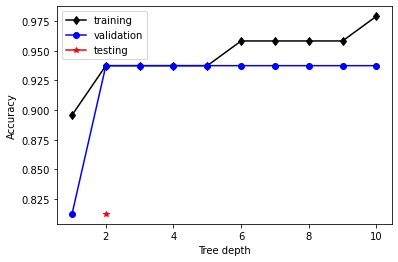

In [ ]:
y1_test_prob_dt = run_DT_experiment(cost_misclassification, True)

best depth = 2, test accuracy = 0.75


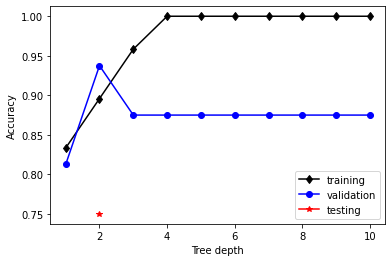

In [ ]:
run_DT_experiment(cost_entropy)

best depth = 2, test accuracy = 0.8125


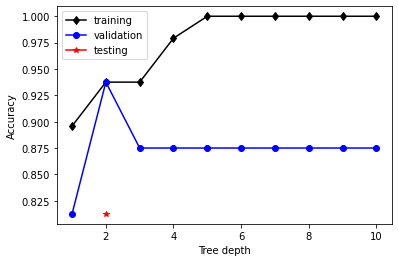

In [ ]:
run_DT_experiment(cost_gini_index)

#### Decision Boundaries

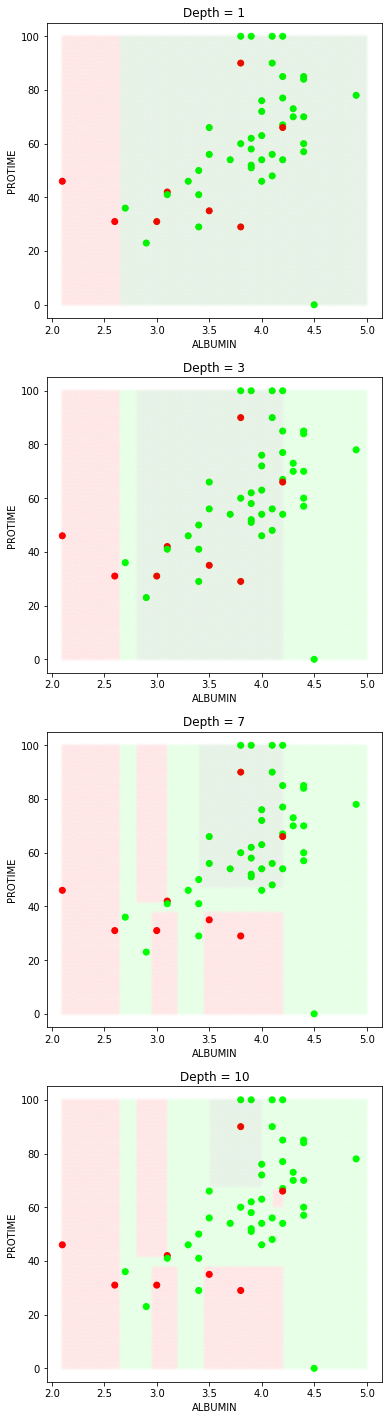

In [ ]:
x1_db = np.stack((x1[:,-3], x1[:,-2]), axis = 1)
x1_train_db = np.stack((x1_train[:,-3], x1_train[:,-2]),axis = 1)

x0v_1 = np.linspace(np.min(x1_db[:,0]), np.max(x1_db[:,0]), 200)
x1v_1 = np.linspace(np.min(x1_db[:,1]), np.max(x1_db[:,1]), 200)
x0_1,x1_1 = np.meshgrid(x0v_1, x1v_1)
x1_all = np.vstack((x0_1.ravel(),x1_1.ravel())).T

depth = [1,3,7,10]
fig, axs = plt.subplots(len(depth))
fig.set_figheight(25)

for tree_depth in depth:
     model = DecisionTree(max_depth=tree_depth, num_classes = 3)
     y1_train_prob = np.zeros((y1_train.shape[0], 3))
     y1_train_prob[np.arange(y1_train.shape[0]), y1_train] = 1
     y1_prob_all = model.fit(x1_train_db, y1_train).predict(x1_all)
     index = depth.index(tree_depth)
     axs[index].scatter(x1_train_db[:,0], x1_train_db[:,1], c=y1_train_prob, marker='o', alpha=1)
     axs[index].scatter(x1_all[:,0], x1_all[:,1], c=y1_prob_all, marker='.', alpha=.01)
     axs[index].set_ylabel('PROTIME')
     axs[index].set_xlabel('ALBUMIN')
     axs[index].set_title('Depth = ' + str(tree_depth))

### Model Evaluation

In [ ]:
def evaluate(models):
    perf = {}

    for model_name, data in models.items():
        y_test, y_test_prob = data
        # compute ROC and AUROC
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        auroc = roc_auc_score(y_test, y_test_prob)
        # compute PRC and AUPRC
        precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
        auprc = auc(recall, precision)

        perf[model_name] = {'fpr':fpr,'tpr':tpr,'auroc':auroc,
                            'precision':precision,'recall':recall,'auprc':auprc}
    return perf

def plot_roc(perf):
    plt.clf()
    i = 0
    for model_name, model_perf in perf.items():
        plt.plot(model_perf['fpr'], model_perf['tpr'],
                label=model_name)
        plt.text(0.4, i, model_name + ': AUC = '+
                str(round(model_perf['auroc'],2)))
        i += 0.1

    plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
    plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig('roc_multimethods.png', bbox_inches='tight', dpi=300)

def plot_prc(perf):
    plt.clf()
    i = 0
    for model_name, model_perf in perf.items():
        plt.plot(model_perf['recall'], model_perf['precision'],label=model_name)
        plt.text(0.4, 0.75+i*0.3, model_name + ': AUC = '+ str(round(model_perf['auprc'],2)))
        i += 0.1

    plt.legend(bbox_to_anchor=(0.5, 0.8))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
    plt.savefig('prc_multimethods.png', bbox_inches='tight', dpi=300)

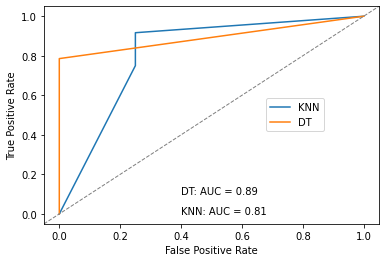

In [ ]:
models1 = {"KNN": (y1_test_knn, y1_test_prob_knn[:,1]), 
           "DT": (y1_test_dt, y1_test_prob_dt[:,1])}
perf1 = evaluate(models1)
plot_roc(perf1)

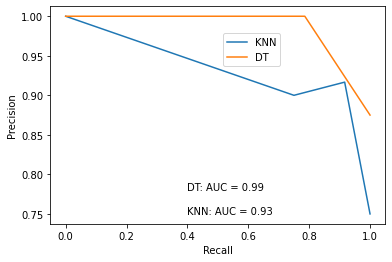

In [ ]:
plot_prc(perf1)

## messidor features

### KNN

In [ ]:
# Standardize the data
std_df2 = df2.copy()
for f in colnames2:
    if f not in catag_var2:
        std_df2[f] = (std_df2[f] - std_df2[f].mean())/std_df2[f].std()

# extract x and y from the dataframe
df2_np = std_df2.to_numpy()
#x2, y2 = df2_np[:, :19], df2_np[:, 19].astype(int)
x2 = df2_np[:, :19]
y2 = df2_np[:, 19].astype(int)
#print(y2)
#print(np.max(y2))

In [ ]:
# print the feature shape and classes of dataset 
(N,D), C = x2.shape, np.max(y2[1:])+1
#(N,D) = x2.shape
#print(y2[1:])
#C = str(int(np.max(y2))+1)
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# generates an indices array from 0 to N-1 and permutes it 
inds = np.random.permutation(N)

# split the dataset into training, validation and testing set
train_ind = round(N * 0.6)
val_ind = round(N * 0.8)
x2_train, y2_train = x2[inds[:train_ind]], y2[inds[:train_ind]]
x2_val, y2_val = x2[inds[train_ind:val_ind]], y2[inds[train_ind:val_ind]]
x2_test, y2_test = x2[inds[val_ind:]], y2[inds[val_ind:]]
y2_test_knn = y2_test.copy()

instances (N) 	 1151 
 features (D) 	 19 
 classes (C) 	 2


In [ ]:
def run_KNN_experiment_2(try_distance_fn, return_prob=False):
    model_choices=[]
    valid_acc = []

    for k in range(1,21):
        knn = KNN(K=k, dist_fn = try_distance_fn) # create a KNN object (OOP)
    
        y2_val_prob,_ = knn.fit(x2_train, y2_train).predict(x2_val)
        y2_val_pred = np.argmax(y2_val_prob, axis=-1)
        accuracy = evaluate_acc(y2_val_pred, y2_val)
        model_choices.append(k)
        valid_acc.append(accuracy)

    # use the best K to predict test data
    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    knn = KNN(K=best_valid_K, dist_fn = try_distance_fn)
    y2_test_prob,_ = knn.fit(x2_train, y2_train).predict(x2_test)
    y2_test_pred = np.argmax(y2_test_prob, axis=-1)
    test_accuracy = evaluate_acc(y2_test_pred, y2_test)
    print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

    plt.plot(model_choices, valid_acc, label='validation')
    plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.savefig('messidor_bestK.png',dpi=300,bbox_inches='tight')

    if return_prob:
        return y2_test_prob

best K = 9, test accuracy = 0.6434782608695652


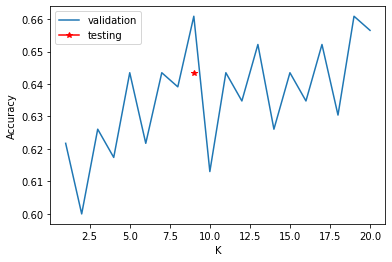

In [ ]:
y2_test_prob_knn = run_KNN_experiment_2(euclidean, True)

best K = 5, test accuracy = 0.6


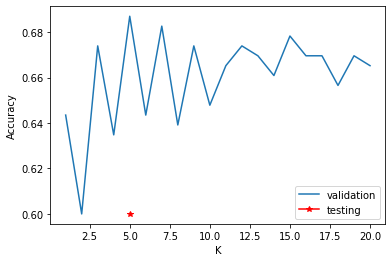

In [ ]:
run_KNN_experiment_2(manhattan)

best K = 19, test accuracy = 0.5782608695652174


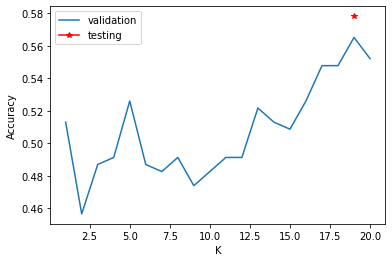

In [ ]:
run_KNN_experiment_2(cosine)

#### Decision Boundaries

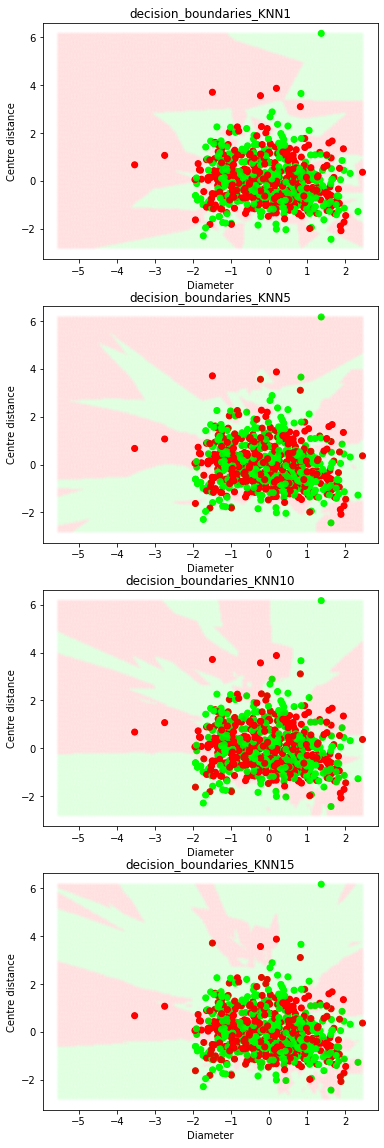

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x2_db_k2 = np.stack((x2[:,-3], x2[:,-2]), axis = 1)
x2_train_db_k2 = np.stack((x2_train[:,-3], x2_train[:,-2]),axis = 1)

x0v_k2 = np.linspace(np.min(x2_db_k2[:,0]), np.max(x2_db_k2[:,0]), 200)
x1v_k2 = np.linspace(np.min(x2_db_k2[:,1]), np.max(x2_db_k2[:,1]), 200)
x0_k2, x1_k2 = np.meshgrid(x0v_k2, x1v_k2)
x_all_k2 = np.vstack((x0_k2.ravel(),x1_k2.ravel())).T

ks = [1,5,10,15]
fig, axs = plt.subplots(len(ks))
fig.set_figheight(20)

for k in ks:
  model = KNN(K=k,C = 3)
  y_train_prob_k2 = np.zeros((y2_train.shape[0], 3))
  y_train_prob_k2[np.arange(y2_train.shape[0]), y2_train] = 1

  y_prob_all_k2, _ = model.fit(x2_train_db_k2, y2_train).predict(x_all_k2)
  y_pred_all_k2 = np.zeros_like(y_prob_all_k2)
  y_pred_all_k2[np.arange(x_all_k2.shape[0]), np.argmax(y_prob_all_k2, axis=-1)] = 1    

  index = ks.index(k)

  depth = [1,2,3,7,10,20]
  axs[index].scatter(x2_train_db_k2[:,0], x2_train_db_k2[:,1], c=y_train_prob_k2, marker='o', alpha=1)
  axs[index].scatter(x_all_k2[:,0], x_all_k2[:,1], c=y_pred_all_k2, marker='.', alpha=0.01)
  axs[index].set_ylabel('Centre distance')
  axs[index].set_xlabel('Diameter')
  axs[index].set_title('decision_boundaries_KNN'+str(k))

### DT

In [ ]:
# extract x and y from the dataframe
df2_np = df2.to_numpy()
x2, y2 = df2_np[:, :19], df2_np[:, 19].astype(int)

In [ ]:
# print the feature shape and classes of dataset 
(N,D), C = x2.shape, np.max(y2)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# generates an indices array from 0 to N-1 and permutes it 
inds = np.random.permutation(N)

# split the dataset into training, validation and testing set
train_ind = round(N * 0.6)
val_ind = round(N * 0.8)
x2_train, y2_train = x2[inds[:train_ind]], y2[inds[:train_ind]]
x2_val, y2_val = x2[inds[train_ind:val_ind]], y2[inds[train_ind:val_ind]]
x2_test, y2_test = x2[inds[val_ind:]], y2[inds[val_ind:]]
y2_test_dt = y2_test.copy()

instances (N) 	 1151 
 features (D) 	 19 
 classes (C) 	 2


In [ ]:
def run_DT_experiment_2(try_cost_fn, return_prob=False):
    model_choices=[]
    train_acc = []
    valid_acc = []

    for d in range(1, 11):
        dt = DecisionTree(max_depth=d, cost_fn=try_cost_fn) # create a DT object (OOP)

        y2_train_prob = dt.fit(x2_train, y2_train).predict(x2_train)
        y2_train_pred = np.argmax(y2_train_prob, axis=-1)
        acc_tr = evaluate_acc(y2_train_pred, y2_train)

        y2_val_prob = dt.fit(x2_train, y2_train).predict(x2_val)
        y2_val_pred = np.argmax(y2_val_prob, axis=-1)
        acc_va = evaluate_acc(y2_val_pred, y2_val)

        model_choices.append(d)
        train_acc.append(acc_tr)
        valid_acc.append(acc_va)

    # use the best d to predict test data
    best_depth = model_choices[valid_acc.index(max(valid_acc))]
    dt = DecisionTree(max_depth=best_depth, cost_fn=try_cost_fn)
    y2_test_prob = dt.fit(x2_train, y2_train).predict(x2_test)
    y2_test_pred = np.argmax(y2_test_prob, axis=-1)
    test_accuracy = evaluate_acc(y2_test_pred, y2_test)
    print(f'best depth = {best_depth}, test accuracy = {test_accuracy}')

    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.plot(best_depth, test_accuracy, marker='*', color='red', label='testing')
    plt.xlabel("Tree depth")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.savefig('messidor_bestD.png',dpi=300,bbox_inches='tight')

    if return_prob:
        return y2_test_prob

best depth = 8, test accuracy = 0.5782608695652174


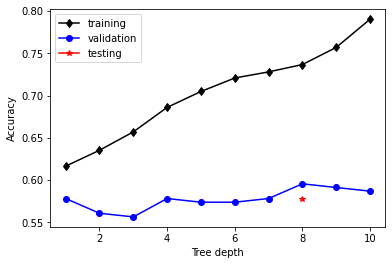

In [ ]:
y2_test_prob_dt = run_DT_experiment_2(cost_misclassification, True)

best depth = 6, test accuracy = 0.6434782608695652


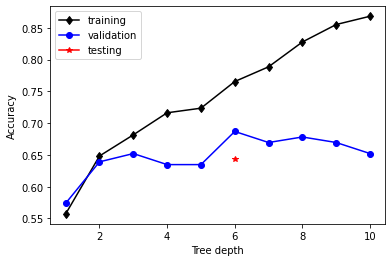

In [ ]:
run_DT_experiment_2(cost_entropy)

best depth = 9, test accuracy = 0.5869565217391305


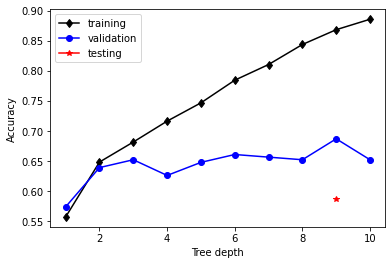

In [ ]:
run_DT_experiment_2(cost_gini_index)

#### Decision Boundaries

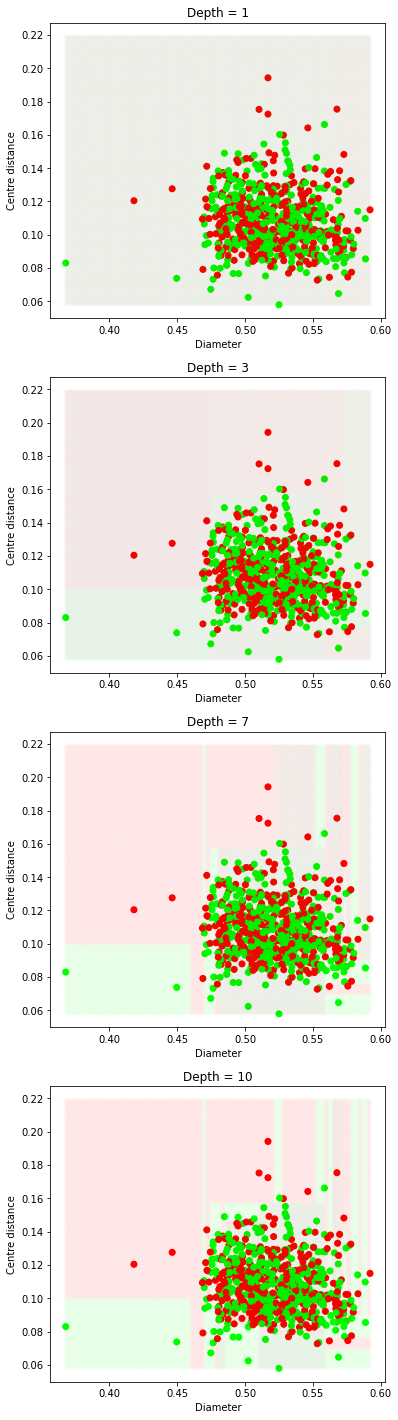

In [ ]:
x2_db = np.stack((x2[:,-3], x2[:,-2]), axis = 1)
x2_train_db = np.stack((x2_train[:,-3], x2_train[:,-2]),axis = 1)

x0v_2 = np.linspace(np.min(x2_db[:,0]), np.max(x2_db[:,0]), 200)
x1v_2 = np.linspace(np.min(x2_db[:,1]), np.max(x2_db[:,1]), 200)
x0_2,x1_2 = np.meshgrid(x0v_2, x1v_2)
x2_all = np.vstack((x0_2.ravel(),x1_2.ravel())).T

depth = [1,3,7,10]
fig, axs = plt.subplots(len(depth))
fig.set_figheight(25)

for tree_depth in depth:
     model = DecisionTree(max_depth=tree_depth, num_classes = 3)
     y2_train_prob = np.zeros((y2_train.shape[0], 3))
     y2_train_prob[np.arange(y2_train.shape[0]), y2_train] = 1
     y2_prob_all = model.fit(x2_train_db, y2_train).predict(x2_all)
     index = depth.index(tree_depth)
     axs[index].scatter(x2_train_db[:,0], x2_train_db[:,1], c=y2_train_prob, marker='o', alpha=1)
     axs[index].scatter(x2_all[:,0], x2_all[:,1], c=y2_prob_all, marker='.', alpha=.01)
     axs[index].set_ylabel('Centre distance')
     axs[index].set_xlabel('Diameter')
     axs[index].set_title('Depth = ' + str(tree_depth))

### Model Evaluation

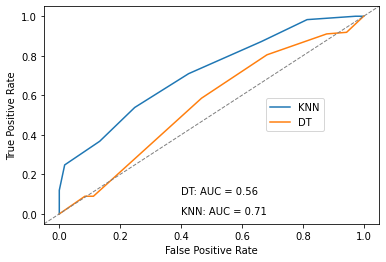

In [ ]:
models2 = {"KNN": (y2_test_knn, y2_test_prob_knn[:,1]), 
           "DT": (y2_test_dt, y2_test_prob_dt[:,1])}
perf2 = evaluate(models2)
plot_roc(perf2)

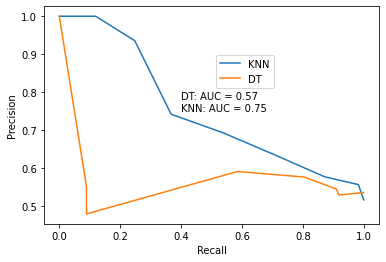

In [ ]:
plot_prc(perf2)